# **Proyecto: Análisis de datos trending youtube**

El presente proyecto tiene como fin el análisis de datos de youtube para implementar una estrategia de marketing de venta
de una marca.

Para esto se usará la metodología de data mining: SEMMA que incluye las etapas de muestreo, exploración de datos, modificación, modelado y evaluación.

### **Etapa de muestreo**

Para esta etapa se extrae una muestra que represente los rasgos comunes de interés. Los datos de interés son la población de 
estados unidos interactuando en youtube.

In [279]:
#Importación de librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
import datetime
import re
import sqlite3

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

import datetime
from datetime import datetime
import json

import math
import folium

In [280]:
#Lectura de los datos
path = "D:/Github/Proyecto-youtube/proyecto-youtube/archive/USvideos.csv"
df_youtube = pd.read_csv(path)

In [281]:
#Mostrando el máximo de columnas

pd.set_option('display.max_columns', None)

Se puede apreciar que se tienen alrededor de 40949 registros, lo cual es un conjunto de datos ideal como muestra,
no se reducirá el tamaño de la muestra.

In [282]:
#Mostrando los datos
df_youtube

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [283]:
df_youtube['channel_title'].value_counts().head(50)

ESPN                                      203
The Tonight Show Starring Jimmy Fallon    197
TheEllenShow                              193
Vox                                       193
Netflix                                   193
The Late Show with Stephen Colbert        187
Jimmy Kimmel Live                         186
Late Night with Seth Meyers               183
Screen Junkies                            182
NBA                                       181
CNN                                       180
Saturday Night Live                       175
WIRED                                     171
BuzzFeedVideo                             169
INSIDER                                   167
The Late Late Show with James Corden      163
TED-Ed                                    162
Tom Scott                                 159
WWE                                       157
CollegeHumor                              156
HellthyJunkFood                           153
First We Feast                    

In [284]:
print('Numero de registros es: {}'.format(len(df_youtube)))

Numero de registros es: 40949


### **Etapa exploración de datos**

A continuación la etapa de exploración de los datos para identificación de las transformaciones y actividades
necesarias para la utilización de los datos en el modelado.

In [285]:
df_youtube.isnull().sum() 

video_id                    0
trending_date               0
title                       0
channel_title               0
category_id                 0
publish_time                0
tags                        0
views                       0
likes                       0
dislikes                    0
comment_count               0
thumbnail_link              0
comments_disabled           0
ratings_disabled            0
video_error_or_removed      0
description               570
dtype: int64

Se puede observar que en el campo de descripción hay algunos datos nulos por lo que se procesarán

In [286]:
df_youtube.duplicated().sum()

48

Se debe eliminar los registros duplicados también

In [287]:
df_youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40949 non-null  object
 1   trending_date           40949 non-null  object
 2   title                   40949 non-null  object
 3   channel_title           40949 non-null  object
 4   category_id             40949 non-null  int64 
 5   publish_time            40949 non-null  object
 6   tags                    40949 non-null  object
 7   views                   40949 non-null  int64 
 8   likes                   40949 non-null  int64 
 9   dislikes                40949 non-null  int64 
 10  comment_count           40949 non-null  int64 
 11  thumbnail_link          40949 non-null  object
 12  comments_disabled       40949 non-null  bool  
 13  ratings_disabled        40949 non-null  bool  
 14  video_error_or_removed  40949 non-null  bool  
 15  de

Se tiene por acciones el cambio de trending_date a tipo datetime, publish_time a formato adecuado. Adicional a esto se debe 
limpiar la columna tags y formato de visualizacion de datos en los numeros

In [288]:
df_youtube.describe()

,category_id,views,likes,dislikes,comment_count
count,40949.000000,4.094900e+04,4.094900e+04,4.094900e+04,4.094900e+04
mean,19.972429,2.360785e+06,7.426670e+04,3.711401e+03,8.446804e+03
std,7.568327,7.394114e+06,2.288853e+05,2.902971e+04,3.743049e+04
min,1.000000,5.490000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,17.000000,2.423290e+05,5.424000e+03,2.020000e+02,6.140000e+02
50%,24.000000,6.818610e+05,1.809100e+04,6.310000e+02,1.856000e+03
75%,25.000000,1.823157e+06,5.541700e+04,1.938000e+03,5.755000e+03
max,43.000000,2.252119e+08,5.613827e+06,1.674420e+06,1.361580e+06


Con los estadísticos se puede observar la gran dispersión que hay en los datos, por la desviación estándar tan elevada.

Se puede observar adicional a esto que hay videos con cero likes aunque tengan visualizaciones.

### **Etapa modificación de datos**

Para esta etapa se realizarán las transformaciones evaluadas de manera previa para realizar análisis y modelado
con datos estructurados.

In [289]:
#Se crea una copia para realizar la limpieza de los datos
df_clean = df_youtube.copy()

In [290]:
#Reemplazo de valores nulos por espacio
df_clean["description"] = df_clean["description"].fillna(value="")

In [291]:
#Eliminar valores duplicados
df_clean = df_clean.drop_duplicates()

In [292]:
#Se comprueba que el dataframe ya está correcto.
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40901 entries, 0 to 40948
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   video_id                40901 non-null  object
 1   trending_date           40901 non-null  object
 2   title                   40901 non-null  object
 3   channel_title           40901 non-null  object
 4   category_id             40901 non-null  int64 
 5   publish_time            40901 non-null  object
 6   tags                    40901 non-null  object
 7   views                   40901 non-null  int64 
 8   likes                   40901 non-null  int64 
 9   dislikes                40901 non-null  int64 
 10  comment_count           40901 non-null  int64 
 11  thumbnail_link          40901 non-null  object
 12  comments_disabled       40901 non-null  bool  
 13  ratings_disabled        40901 non-null  bool  
 14  video_error_or_removed  40901 non-null  bool  
 15  de

In [293]:
#Se procede a transformar las columnas que requieren cambiar sus variables a unas del tipo datetime
df_clean['trending_date'] = df_clean['trending_date'].apply(lambda x: datetime.strptime(x, "%d.%y.%m").date())


df_clean['trending_date'] = pd.to_datetime(df_clean['trending_date'])

In [294]:
#Ahora falta modificar los otros datos tipo object para transformarlos en fecha

df_clean['publish_time'] = df_clean['publish_time'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%fZ').strftime("%Y-%m-%d %H:%M:%S"))


df_clean['publish_time'] = pd.to_datetime(df_clean['publish_time'])

In [295]:
#Ahora separare la fecha y hora de publicación de un video para el análisis de los datos
df_clean['publish_date'] = df_clean['publish_time'].dt.date
df_clean['publish_time'] = df_clean['publish_time'].dt.time

In [296]:
df_clean.head(2)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date
0,2kyS6SvSYSE,2014-11-17,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13
1,1ZAPwfrtAFY,2014-11-17,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13


In [297]:
#Falta adicionar los nombres de las categorias que tienen los videos para eso se extrae del archivo tipo json la 
# equivalencia de las categorias.

name_category = {}

path_id_category = "D:/Github/Proyecto-youtube/proyecto-youtube/archive/US_category_id.json"

with open(path_id_category, 'r') as f:
    data = json.load(f)
    for category in data['items']:
        name_category[category['id']] = category['snippet']['title']
        
name_category = {int(key): value for key, value in name_category.items()}

In [298]:
#Insertar en el dataframe 
name_category

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 29: 'Nonprofits & Activism',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [299]:
df_clean['category_name'] = df_clean['category_id'].map(name_category)

In [300]:
df_clean.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,publish_date,category_name
0,2kyS6SvSYSE,2014-11-17,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,17:13:01,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,2017-11-13,People & Blogs
1,1ZAPwfrtAFY,2014-11-17,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,07:30:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",2017-11-13,Entertainment
2,5qpjK5DgCt4,2014-11-17,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2017-11-12,Comedy
3,puqaWrEC7tY,2014-11-17,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,11:00:04,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,2017-11-13,Entertainment
4,d380meD0W0M,2014-11-17,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2017-11-12,Entertainment


## **Análisis exploratorio de los datos**

Para la construcción del análisis hay algunas preguntas que son interesantes de responder a traves de los datos para
la generación de la campaña de marketing, entre estas están: 

● ¿Cuáles son las categorías de vídeos que reciben mayores vistas y
Likes? -----------

● ¿Es posible encontrar agrupaciones o clasificaciones de videos? 

● ¿Cuál es la combinación de características o atributos más
importantes que hacen de un video tendencia?

● ¿La temporada o fecha en el que el video es publicado tiene alguna
influencia?

● ¿Es posible predecir cuantos likes o visitas tendrá un video? Si es así,
crea un modelo que lo compruebe.

● ¿Cuál es la evolución temporal de las interacciones en YouTube para los videos más
 populares en Estados Unidos?

● ¿Existen diferencias en las interacciones (likes, comentarios, vistas) entre diferentes 
 categorías de videos en YouTube en Estados Unidos?

● Existen palabras clave (tags) que están fuertemente relacionadas con un mayor número de vistas 
y likes en los videos de tendencia en YouTube en Estados Unidos?

●¿Cuáles son los videos que generan más controversia en términos de dislikes y comentarios 
negativos?

●¿Existe alguna correlación entre el número de comentarios y el número de likes en los videos de 
tendencia?


●¿Cúales son las palabras mas populares en las descripciones de los videos?

#### **CATEGORÍAS CON MAYOR NÚMERO DE VIDEOS EN TENDENCIA**

Text(0.5, 1.0, 'CATEGORIAS DE VIDEOS EN TENDENCIA')

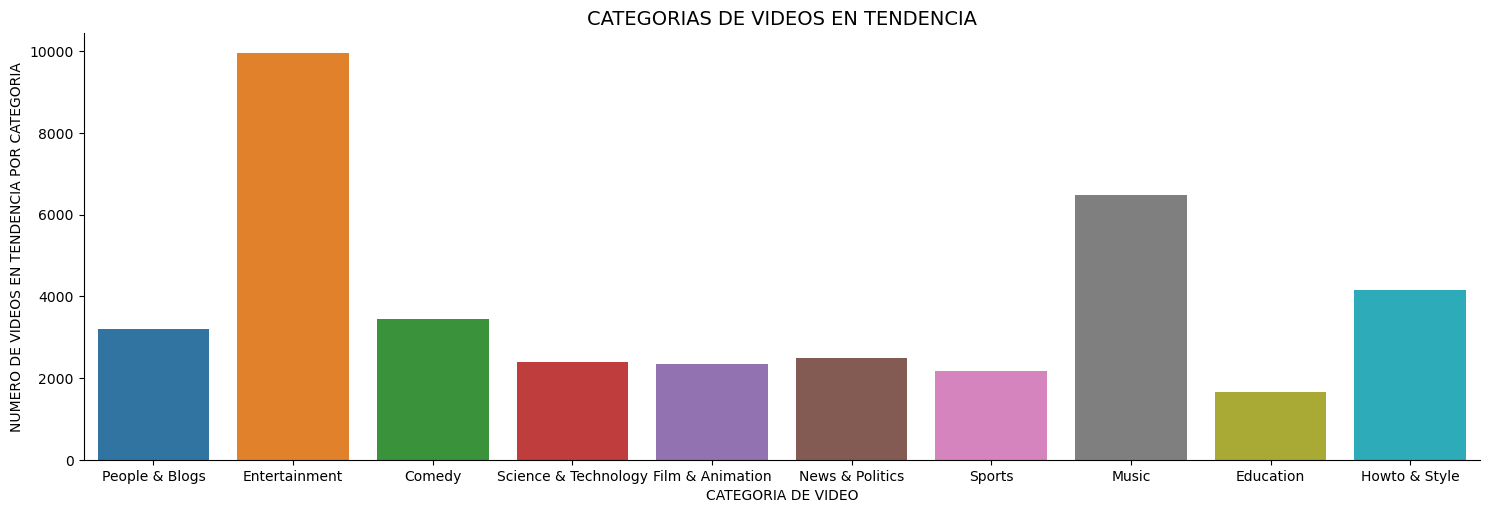

In [301]:
top_10_categories = df_clean['category_name'].value_counts().nlargest(10).index
df_top_10_categories = df_clean[df_clean['category_name'].isin(top_10_categories)]
palette = sns.color_palette('tab10', n_colors=len(top_10_categories))
grid2 = sns.catplot(x='category_name', kind='count', data=df_top_10_categories, palette=palette, aspect=3)
grid2.ax.set_xlabel('CATEGORIA DE VIDEO')
grid2.ax.set_ylabel('NUMERO DE VIDEOS EN TENDENCIA POR CATEGORIA')
grid2.ax.set_title('CATEGORIAS DE VIDEOS EN TENDENCIA', fontsize=14)



La categoría que mas tiene videos en tendencia es la de entretenimiento, seguida de la de música.

#### **LIKES POR CATEGORIA**

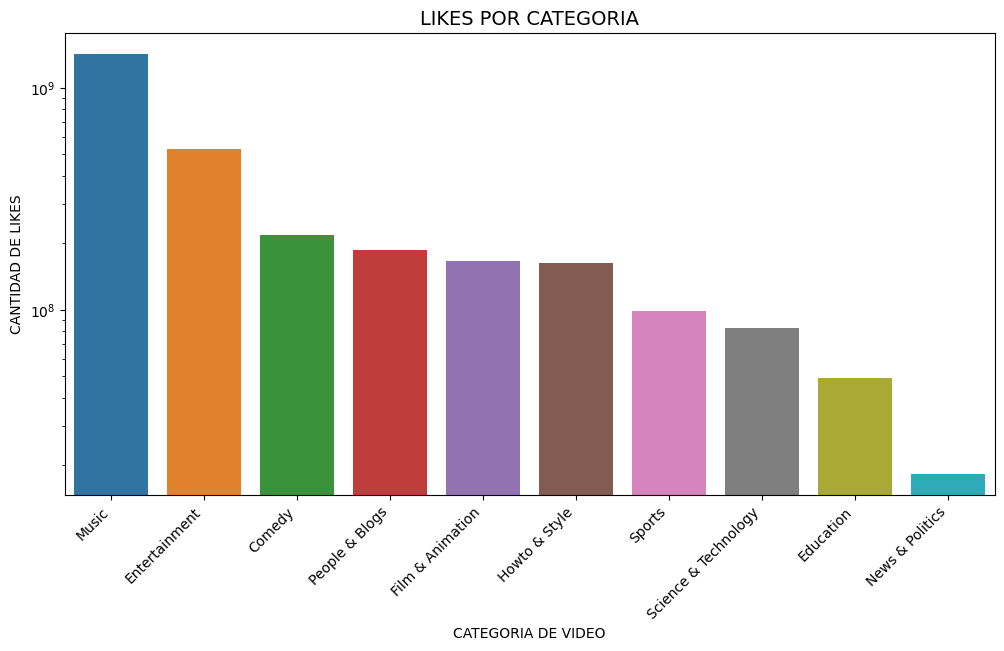

In [302]:
likes_by_category = df_top_10_categories.groupby('category_name')['likes'].sum().sort_values(ascending=False)
palette = sns.color_palette('tab10', n_colors=len(likes_by_category))
plt.figure(figsize=(12, 6))
sns.barplot(x=likes_by_category.index, y=likes_by_category.values, palette=palette)
plt.xlabel('CATEGORIA DE VIDEO')
plt.ylabel('CANTIDAD DE LIKES')
plt.title('LIKES POR CATEGORIA', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()


#### **VIEWS POR CATEGORIAS**

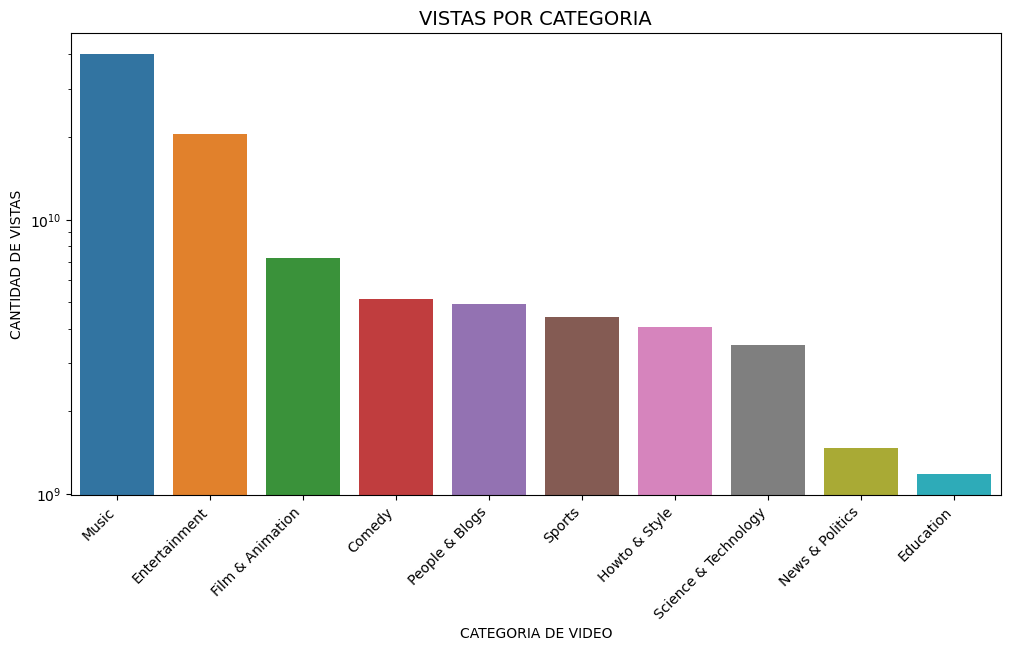

In [303]:
views_by_category = df_top_10_categories.groupby('category_name')['views'].sum().sort_values(ascending=False)
palette = sns.color_palette('tab10', n_colors=len(likes_by_category))
plt.figure(figsize=(12, 6))
sns.barplot(x=views_by_category.index, y=views_by_category.values, palette=palette)
plt.xlabel('CATEGORIA DE VIDEO')
plt.ylabel('CANTIDAD DE VISTAS')
plt.title('VISTAS POR CATEGORIA', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()


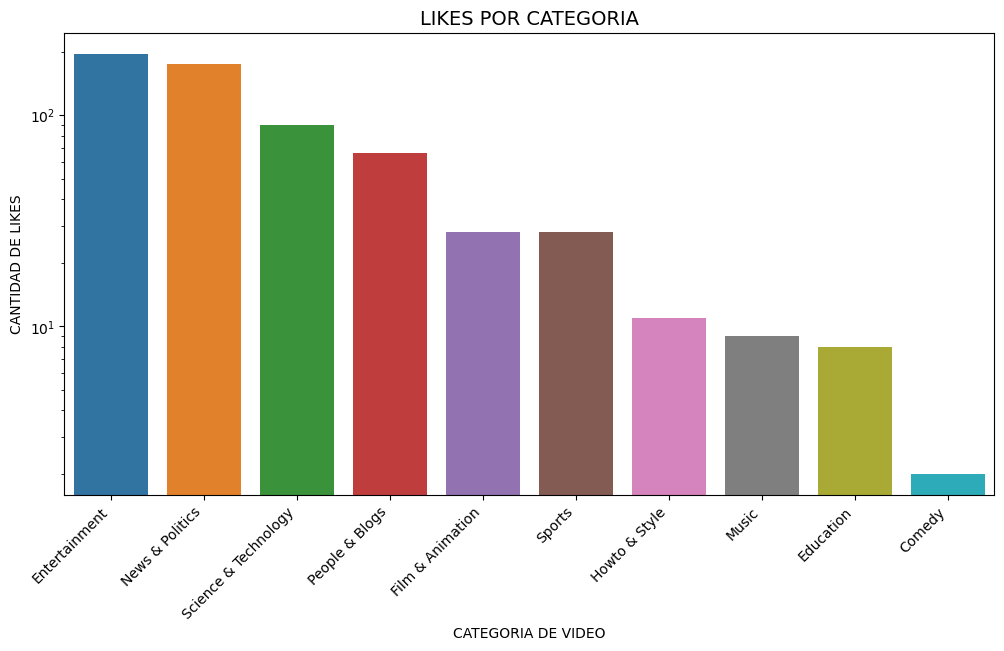

In [304]:
coments_disabled_by_category = df_top_10_categories.groupby('category_name')['comments_disabled'].sum().sort_values(ascending=False)
palette = sns.color_palette('tab10', n_colors=len(likes_by_category))
plt.figure(figsize=(12, 6))
sns.barplot(x=coments_disabled_by_category.index, y=coments_disabled_by_category.values, palette=palette)
plt.xlabel('CATEGORIA DE VIDEO')
plt.ylabel('CANTIDAD DE LIKES')
plt.title('LIKES POR CATEGORIA', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yscale('log')
plt.show()


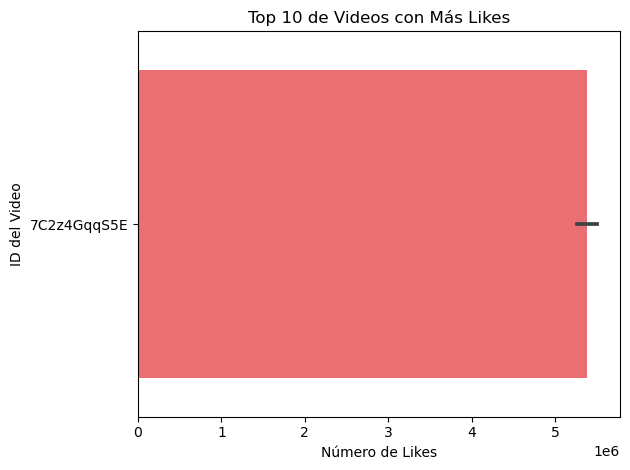

In [316]:
# Obtener el top 10 de videos con más likes
top_10_videos = df_clean.nlargest(10, 'likes')

# Definir una paleta de colores personalizada
my_palette = ['#FF5A5F', '#7B113A', '#FFB400', '#FF3600', '#FF8A5B', '#FF0000', '#FFD700', '#D9BF00', '#FF69B4', '#FF9F40']

# Crear el gráfico de barras con Seaborn y la paleta de colores personalizada
sns.barplot(x='likes', y='video_id', data=top_10_videos, palette=my_palette)

# Personalizar etiquetas y título
plt.xlabel('Número de Likes')
plt.ylabel('ID del Video')
plt.title('Top 10 de Videos con Más Likes')

# Ajustar la visualización del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()


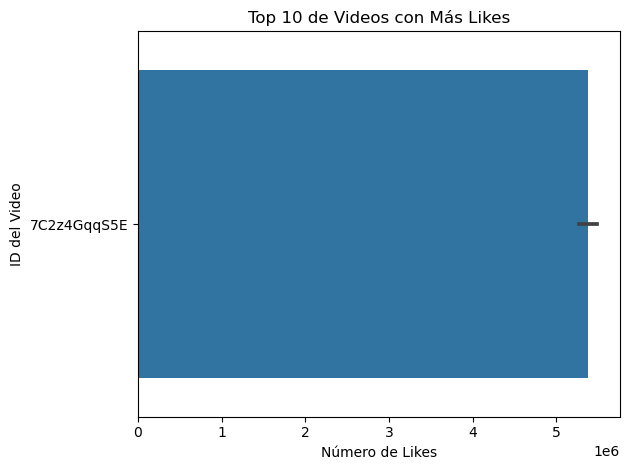

In [318]:


# Obtener el top 10 de videos con más likes
top_10_videos = df_clean.nlargest(10, 'likes')

# Definir una paleta de colores personalizada
my_palette = sns.color_palette('tab10', n_colors=10)

# Crear el gráfico de barras con Seaborn y la paleta de colores personalizada
sns.barplot(x='likes', y='video_id', data=top_10_videos, palette=my_palette)

# Personalizar etiquetas y título
plt.xlabel('Número de Likes')
plt.ylabel('ID del Video')
plt.title('Top 10 de Videos con Más Likes')

# Ajustar la visualización del gráfico
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [319]:
df_clean.corr()

C:\Users\lcbal\AppData\Local\Temp\ipykernel_16044\1863484124.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_clean.corr()


,category_id,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
category_id,1.000000,-0.168243,-0.173946,-0.033583,-0.076365,0.048935,-0.013496,-0.030019
views,-0.168243,1.000000,0.849179,0.472216,0.617657,0.002700,0.015357,-0.002256
likes,-0.173946,0.849179,1.000000,0.447188,0.803088,-0.028903,-0.020891,-0.002642
dislikes,-0.033583,0.472216,0.447188,1.000000,0.700192,-0.004416,-0.008231,-0.001853
comment_count,-0.076365,0.617657,0.803088,0.700192,1.000000,-0.028261,-0.013822,-0.003726
comments_disabled,0.048935,0.002700,-0.028903,-0.004416,-0.028261,1.000000,0.319486,-0.002972
ratings_disabled,-0.013496,0.015357,-0.020891,-0.008231,-0.013822,0.319486,1.000000,-0.001528
video_error_or_removed,-0.030019,-0.002256,-0.002642,-0.001853,-0.003726,-0.002972,-0.001528,1.000000
